In [ ]:
!git clone git@github.com:mHemaAP/model_framework.git
%pushd model_framework
!git pull

In [ ]:
!pip install -qr requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 71.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
%ls
%popd

In [ ]:
import sys
import os
sys.path.append(os.getcwd())
# import pathlib
# target_path = pathlib.Path(os.path.abspath(__file__)).parents[3]
# sys.path.append(target_path)

In [ ]:
import model_framework.main
from model_framework.main import *

/usr/local/lib/python3.10/dist-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Files already downloaded and verified
Files already downloaded and verified


/content/drive/MyDrive/ERA_V1/Session11/dev4/datasets/abstract_dataset.py:84: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  denorm_img = torch.tensor(img, requires_grad=False)


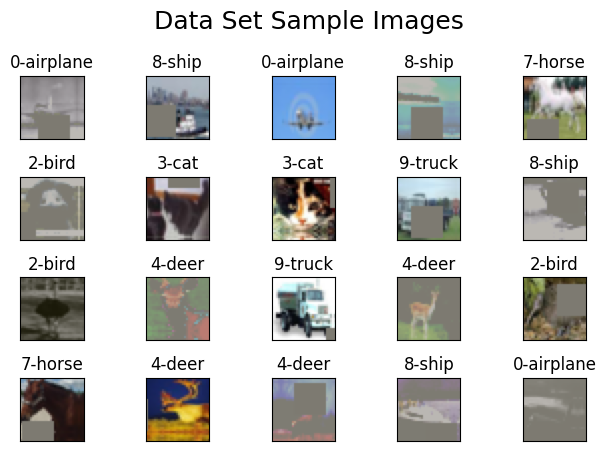

In [ ]:
cifar10_data.show_dataset_images()

In [ ]:
model_summary(model)

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Kernel Shape              Param %
ResNet                                   [64, 3, 32, 32]           [64, 10]                  --                        --                             --
├─Conv2d: 1-1                            [64, 3, 32, 32]           [64, 64, 32, 32]          1,728                     [3, 3]                      0.02%
├─BatchNorm2d: 1-2                       [64, 64, 32, 32]          [64, 64, 32, 32]          128                       --                          0.00%
├─Sequential: 1-3                        [64, 64, 32, 32]          [64, 64, 32, 32]          --                        --                             --
│    └─BasicBlock: 2-1                   [64, 64, 32, 32]          [64, 64, 32, 32]          --                        --                             --
│    │    └─Conv2d: 3-1                  [64, 64, 32, 32]          [64, 64, 32, 32

  0%|          | 0/200 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 6.57E-02


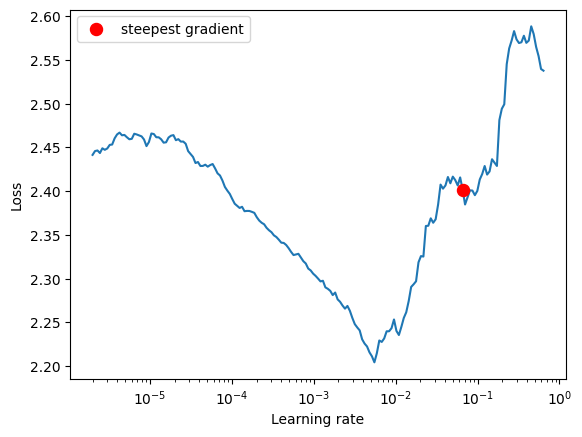

In [ ]:
train_model1 = create_model_train_instance(model,
                                          cifar10_data,
                                          epochs=20,
                                          loss_criterion='CE',
                                          scheduler='one_cycle',
                                          optimizer = 'SGD')

In [ ]:
train_model1.run_training_model()

| Epoch | LR       | Time    | TrainLoss | TrainAcc | TestLoss | TestAcc |
|     1 | 0.013659 | 00m 46s | 1.642099  |  32.93%  | 0.025207 |  47.59% |
|     2 | 0.026662 | 00m 47s | 1.107891  |  48.86%  | 0.015905 |  64.45% |
|     3 | 0.039664 | 00m 46s | 0.965595  |  58.26%  | 0.014161 |  68.55% |
|     4 | 0.052667 | 00m 47s | 0.946686  |  63.91%  | 0.011002 |  75.69% |
|     5 | 0.065647 | 00m 48s | 0.575768  |  67.49%  | 0.010689 |  76.72% |
|     6 | 0.061271 | 00m 47s | 0.845948  |  69.82%  | 0.009702 |   78.7% |
|     7 | 0.056894 | 00m 47s | 1.281400  |  72.26%  | 0.008137 |  82.26% |
|     8 | 0.052518 | 00m 47s | 1.378388  |  73.82%  | 0.007945 |   82.8% |
|     9 | 0.048141 | 00m 47s | 0.744221  |  75.19%  | 0.007215 |  84.18% |
|    10 | 0.043765 | 00m 47s | 1.145057  |  76.36%  | 0.007863 |  83.29% |
|    11 | 0.039389 | 00m 47s | 0.274592  |  77.44%  | 0.006345 |  86.21% |
|    12 | 0.035012 | 00m 48s | 0.621518  |  78.19%  | 0.006086 |  86.98% |
|    13 | 0.030636 | 00m 

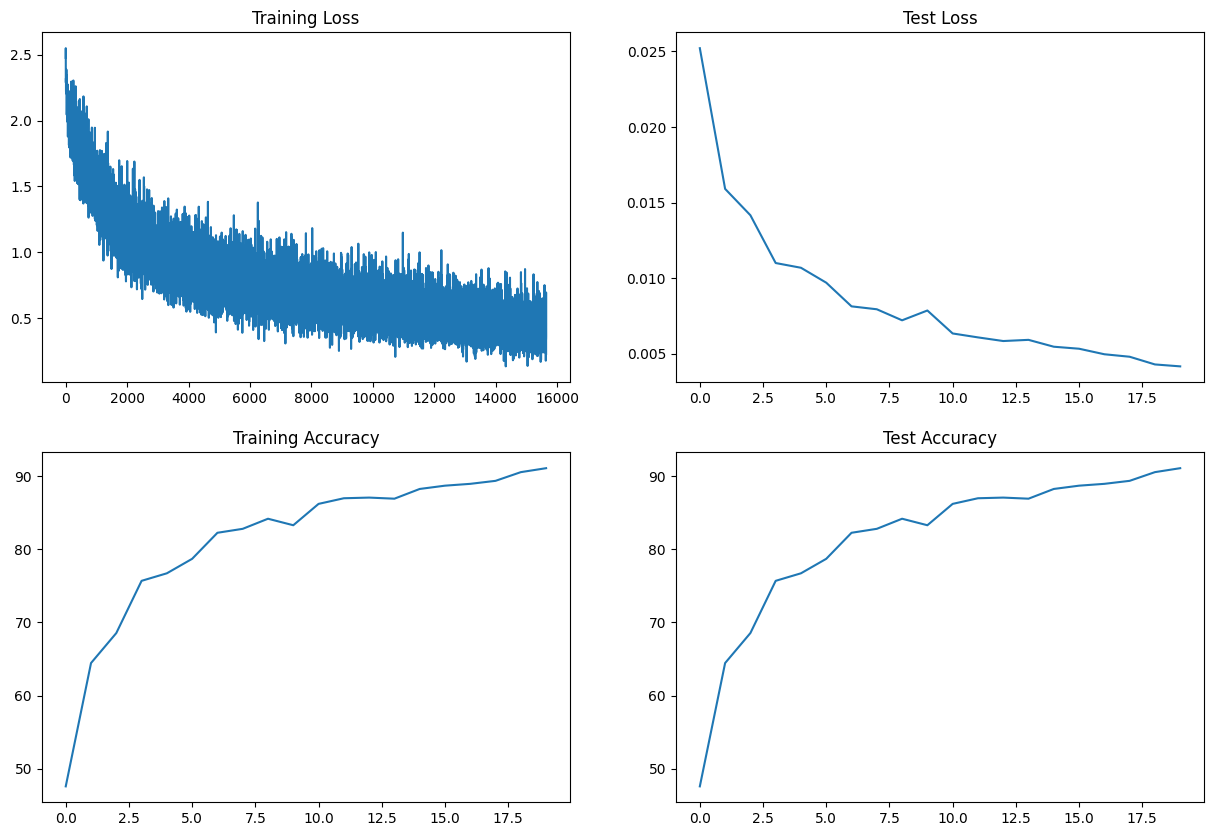

In [ ]:
train_model1.display_model_stats()

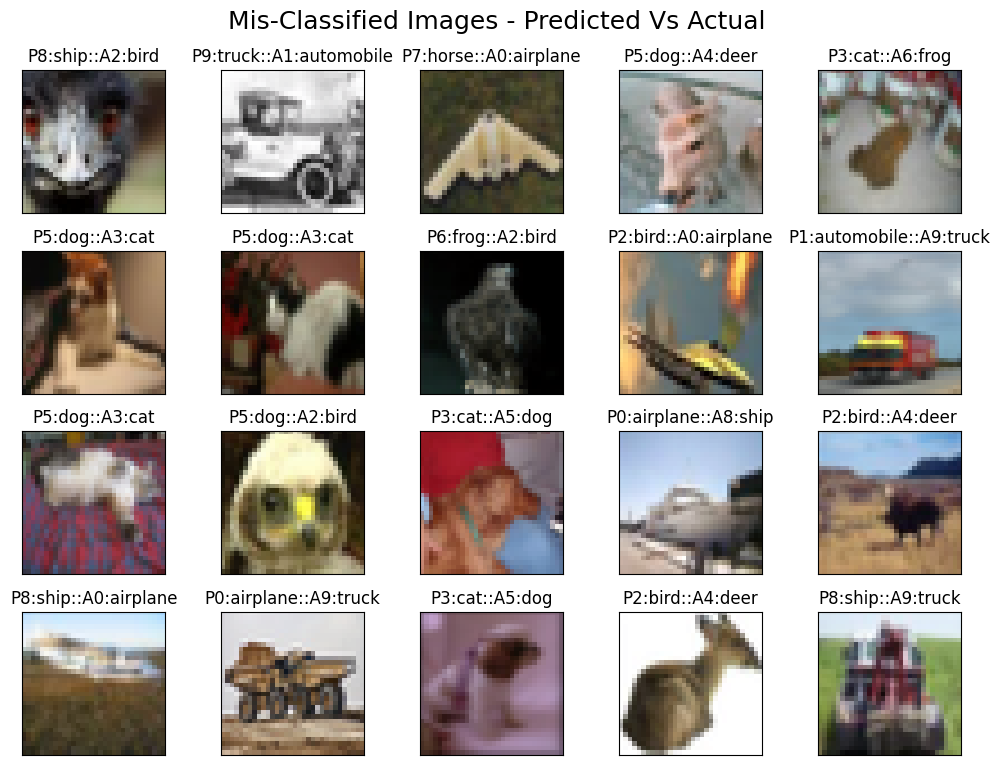

In [ ]:
train_model1.show_cifar10_incorrect_predictions()

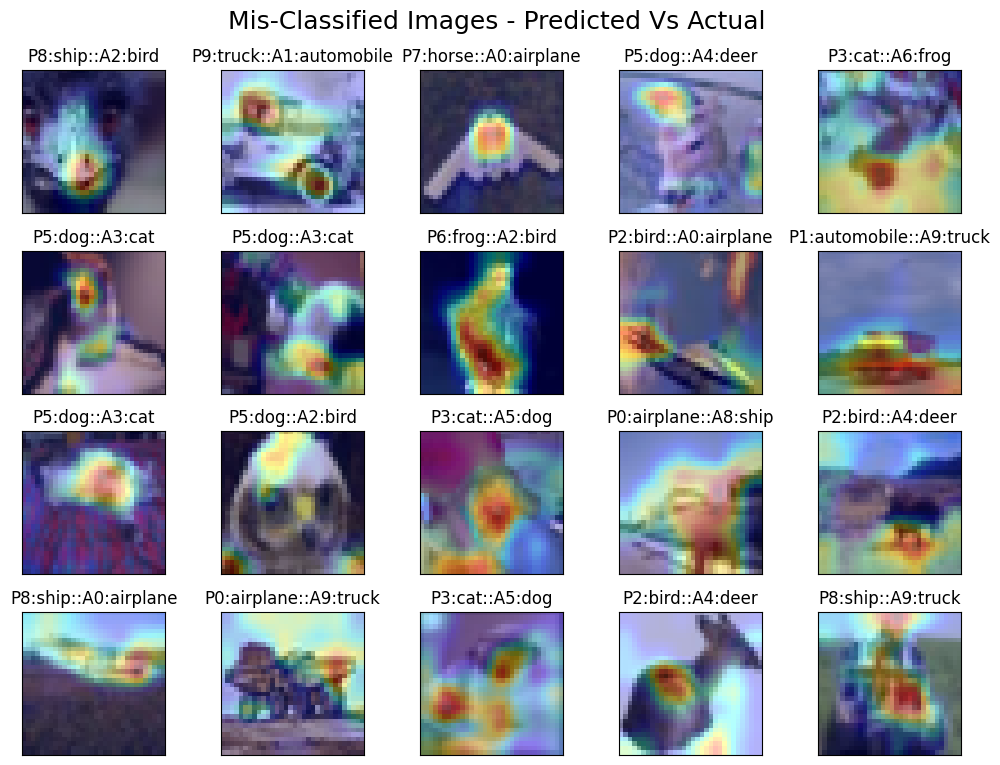

In [ ]:
train_model1.show_cifar10_incorrect_predictions(grad_cam=True)